# ILykei Lecture Series
# Advanced Machine Learning and Artificial Intelligence


## Project: MNIST by Simple NN. How to run it on RCC?


## Yuri Balasanov, &copy; iLykei 2018

##### Main source: [Keras Documentation](https://github.com/keras-team/keras/tree/master/examples)

This notebook shows how to train a simple neural network on the MNIST dataset using GPU on RCC.

There are complete and clear instructions on connecting and running a project on RCC GPU using TensorFlow/Keras [here](https://git.rcc.uchicago.edu/ivy2/TF_midway2).     

## Job running steps     

### Step 1. Create python code    

File with python code that runs on a GPU node on RCC can be created from Jupyter python notebook.    

Use, for example, a simple and shallow sequential network analyzing MNIST data.

In [1]:
from __future__ import print_function

import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import RMSprop
import matplotlib as mpl
from matplotlib import pyplot as plt
import numpy as np
import imageio

/home/yuri/anaconda3/envs/tensorflow/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
Using TensorFlow backend.
/home/yuri/anaconda3/envs/tensorflow/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/home/yuri/anaconda3/envs/tensorflow/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


Set main parameters.

In [2]:
batch_size = 128
num_classes = 10
epochs = 20

Load the data, create train and test samples.

In [3]:
# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()
print('Shape x_train: ',x_train.shape)

Shape x_train:  (60000, 28, 28)


The code in the cell below does visualization. It can work in the notebook, but needs to be removed before running on the cluster. To remove the code simply change the cell type from "Code" to "Markdown" before downloading the file as python.

Shape:  (28, 28)


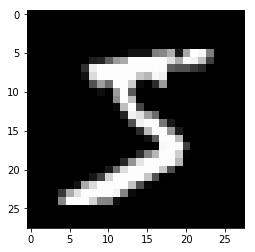

In [4]:
# Remove when make file for RCC GPU
first_image = x_train[0]
print('Shape: ',first_image.shape)
#first_image = np.array(first_image, dtype='float')
#print('First label: ',y_train[0])

plt.imshow(first_image, cmap='gray')
plt.show()

Flatten and normalize the train and test samples images

In [5]:
x_train = x_train.reshape(60000, 784) # each image as vector 784=28*28
x_test = x_test.reshape(10000, 784)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

60000 train samples
10000 test samples


Convert class vectors to binary class matrices.

In [6]:
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)
print('Row size of y_train: ',y_train[0].shape)
print('y_train: \n',y_train[:6])
print('y_test: \n',y_test[:6])

Row size of y_train:  (10,)
y_train: 
 [[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]]
y_test: 
 [[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]]


Create model with 1 hidden layer of 100 units.

In [7]:
model1 = Sequential()
model1.add(Dense(100, activation='relu', input_shape=(784,)))
model1.add(Dense(num_classes, activation='softmax'))

The code in the cell below is not necessary when run the job on RCC GPU. Remove it before downloading the file as python. 

In [8]:
# Remove when make file for RCC GPU

model1.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 100)               78500     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


Follow the steps:

* Compile the model
* Fit it
* Evaluate it.

In [9]:
# Compile the model
model1.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(),
              metrics=['accuracy'])

In [10]:
# Fit the model
history1 = model1.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=0,
                    validation_data=(x_test, y_test))

Save weights of fitted model in a file.

To use these weights later use

`model.load_weights('model1_weights.h5')`

In [11]:
#model1.save('saved_model.h5')
model1.save_weights('model1_weights.h5')

In [12]:
# Evaluate the model
score = model1.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.08581530220233544
Test accuracy: 0.9784


Check how the first 5 numbers from the test sample are predicted. 

In [13]:
print('Actual: \n',y_test[:5],'\n ')
print('Predicted: \n',np.around(np.array(model1.predict(x_test)[:5]), decimals=2))

Actual: 
 [[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]] 
 
Predicted: 
 [[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]]


To finish preparation of the code:
* Deactivate all unnecessary python computing cells by turning them into Markdown type     
* Add code saving all necessary output data into files if necessary. For example, graphs will not be added to the `log.out` file. Save the data you would like to plot and make plot later on your local computer.   
* Download the notebook as python        
* Copy the python code to cluster directory as shown in the sections below.   

### Step 2. Connect to RCC     

Follow instructions for [connecting to RCC with SSH](https://rcc.uchicago.edu/docs/connecting/index.html#connecting-with-ssh)

Look for connection to Midway2 via secure shell (ssh). 

To connect from Linux or Mac run in terminal:

`ssh <CNetID>@midway2.rcc.uchicago.edu`     

and enter CNet password for authentication.

To connect from Windows, first download an ssh client, such as [PuTTY](https://www.chiark.greenend.org.uk/~sgtatham/putty/) which allows to interact with the remote Unix command line. 

### Step 3. Transfer data and code    

Follow [instructions](https://rcc.uchicago.edu/docs/data-transfer/index.html) for transferring files to/from RCC on the RCC web site.

Transfer data from local drive to cluster node according to [instructions](https://rcc.uchicago.edu/docs/data-transfer/index.html) using secure copy (`scp`) protocol either through command line or WinCP interface (for Windows users):    

Open new Terminal window on the local computer and run:     

`scp /path/to/your/local/file <CNetID>@midway2.rcc.uchicago.edu:~/destination_folder`.

Before running this line create directory `destination_folder`, for example, using `mkdir`.     

Use wildcards to send all .py files from local folder to cluster:     

`scp /path/to/your/local/folder/*.py <CNetID>@midway2.rcc.uchicago.edu:~/destination_folder`    

Folders can also be copied recursively (including subdirectories):

`scp -r /path/to/your/local/folder <CNetID>@midway2.rcc.uchicago.edu:~/destination_folder`

To receive file back from cluster to your machine use the same command but with reversed arguments:

`scp <CNetID>@midway2.rcc.uchicago.edu:~/path/to/your/file/on/midway /path/to/local/destination/folder/`

Create a folder for project on the RCC node and copy there all necessary files. 

What needs to be transferred in the folder on RCC:

- Prepared python code
- Data for the project
- SBATCH file described in the following section

### Step 4. Create SBATCH file    

See instructions on creating sbatch [here](https://git.rcc.uchicago.edu/ivy2/TF_midway2/blob/master/examples/GPU/mnist_deep.batch).

Example of sbatch file for the project in this notebook is given below.

Example, of sbatch for the Sattelite Image Segmentation project is in the <a href="https://ilykei.com/api/fileProxy/documents%2FAdvanced%20Machine%20Learning%2FSatellite%20Image%20Segmentation%2Fcode.zip" target="_blank">archive with project code</a>. 




1. Line `#!/bin/bash` means that everything below needs to run using interpreter `bash`     
2. Line `#SBATCH --account=mscagpu` shows account
3. Replace in line `#SBATCH --job-name=rcc_example` "rcc_example" with any name you decide to give this job    
4. Lines `#SBATCH --output=%j_out.log` and `#SBATCH --error=%j_err.log` specify names of the output file and file with error messages. Note that"%j" will be replaced with job id when the job runs. After the job is finished these files will contain all results and all error logs, correspondingly. File `%j_out.log` will include all printouts within the code.    
5. Line `#SBATCH --time=00:10:00` reserves time for the job. After running this time the job is cancelled.   
6. Line `#SBATCH --partition=mscagpu` specifies type of the computing node on Midway2
7. The rest of the lines define requested resources, module, environment where necessary packages have been preinstalled, python source code to be executed on GPU    


### Step 5. Runing the job    

In terminal while logged into RCC Midway 2 navigate to the directory of the project.
Then execute 

`sbatch run.sbatch`   

You will be given job ID. It can be used to cancel your job:    

`scancel your_job_ID`    

To check the status do:

`squeue --user=<CNetID>`    

Output files (uncluding error file) can be read using one of the following commands:

`cat output_file`    
`less output_file`    
`tail -f output_file`

The last command also reflects file modifications and can be used while your job is still running.

Transfer both log files and any saved files from the RCC node when the job is done.

